In [1]:
%matplotlib notebook

import psycopg2.extras
import pandas as pd
from apps.backtesting.rebalancing.comparative_portfolio_evaluation import ComparativePortfolioEvaluation
import logging, sys
logging.disable(sys.maxsize)
import warnings
warnings.filterwarnings('ignore')

portfolio_dicts = {
    'half-and-half': {
        'BTC': 0.5,
        'ETH': 0.5
    },
    'three-musketeers': {
        'BTC': 0.5,
        'ETH': 0.25,
        'LTC': 0.25,
    },
    'fab-five': {
        'BTC': 0.5,
        'ETH': 0.2,
        'LTC': 0.1,
        'XRP': 0.1,
        'EOS': 0.1
    }
}

start_time = '2018/10/01 00:00:00 UTC'
end_time = '2018/10/30 00:00:00 UTC'
rebalancing_periods = [60*60, 60*60*24, 60*60*24*7]

def test_packs(start_time, end_time):
    c = ComparativePortfolioEvaluation(portfolio_dicts, start_time, end_time, rebalancing_periods, 
                                   start_value_of_portfolio=1, counter_currency='BTC', trading_cost_percent=0.25)
    return c

def save_info(comparative_evaluation, out_file):
    df_subset = c.comparative_df[['portfolio','allocations','rebalancing_period_hours',
                                  'profit_percent', 'benchmark_profit_percent',
                                  'profit_percent_usdt','benchmark_profit_percent_usdt']]
    writer = pd.ExcelWriter(out_file)
    df_subset.to_excel(writer)
    writer.save()
    writer.close()
    return df_subset

c = test_packs(start_time, end_time)


INFO:settings:Deployment environment detected: LOCAL
INFO:settings:LOCAL environment detected. Importing local_settings.py
INFO:redis_db:Redis connection established for app database.
INFO:redis_db:Redis currently consumes 40.55% out of 9.80G


<IPython.core.display.Javascript object>


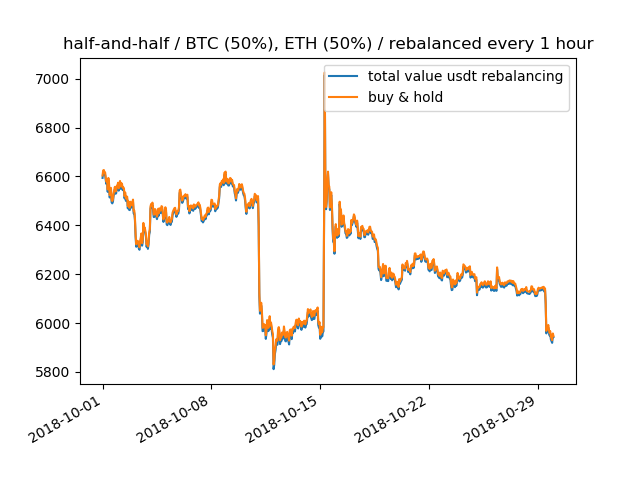

<IPython.core.display.Javascript object>


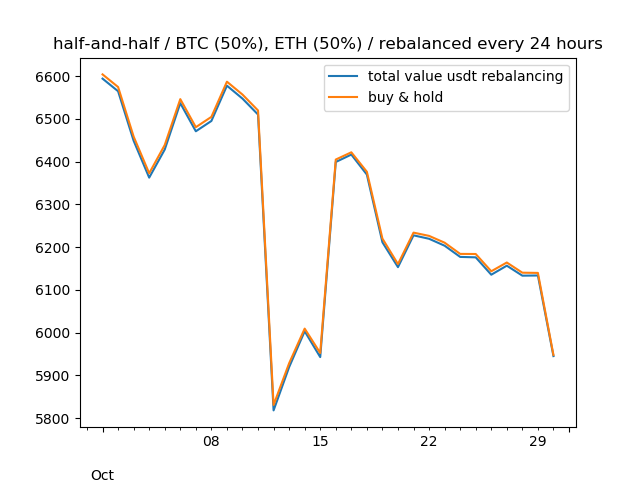

<IPython.core.display.Javascript object>


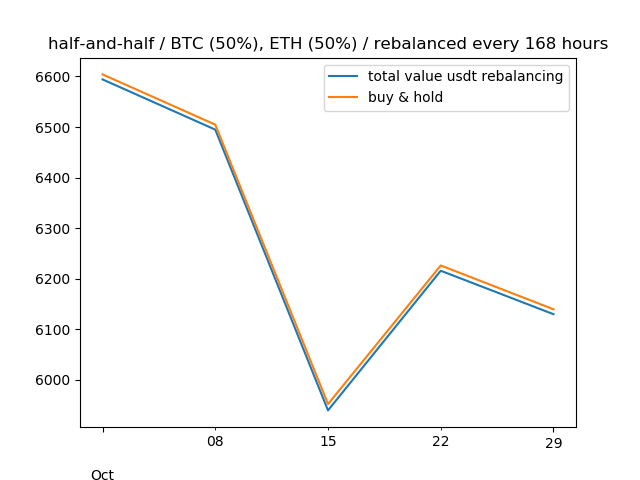

<IPython.core.display.Javascript object>


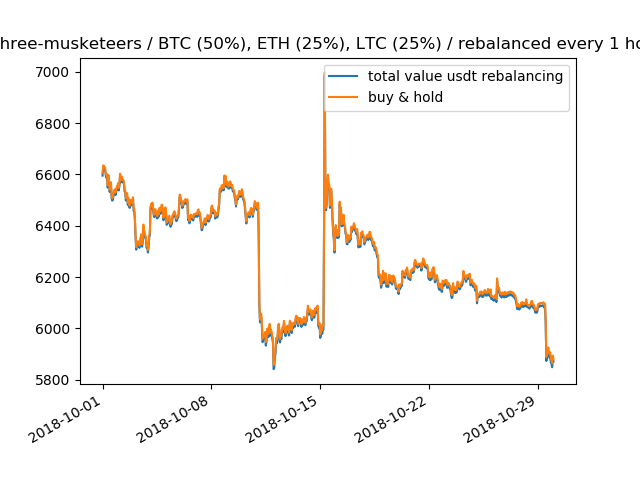

<IPython.core.display.Javascript object>


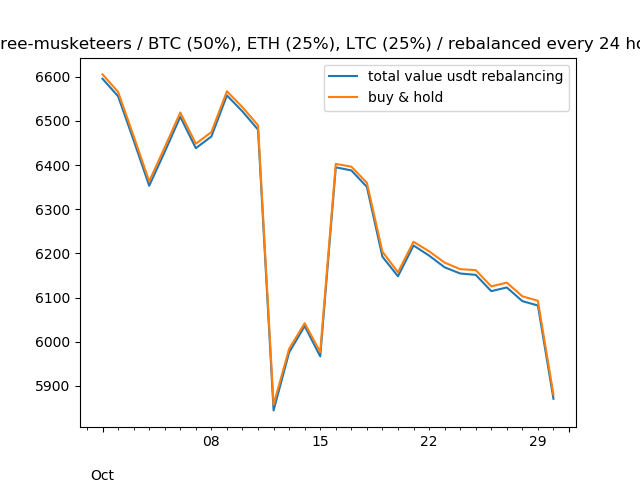

<IPython.core.display.Javascript object>


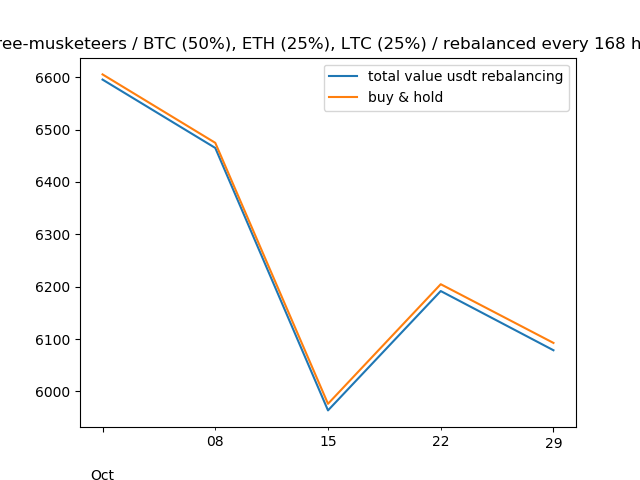

<IPython.core.display.Javascript object>


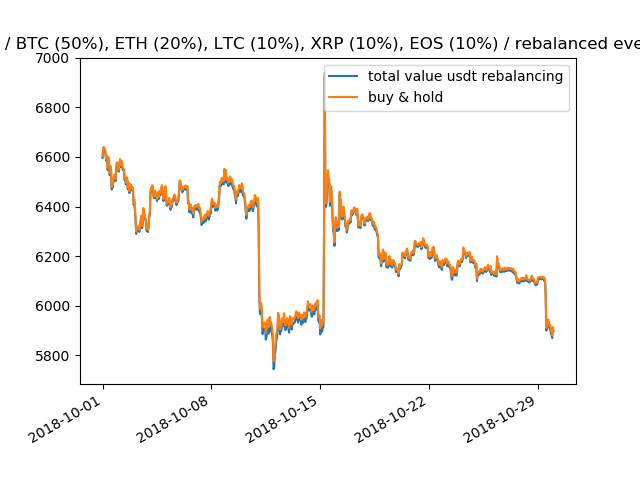

<IPython.core.display.Javascript object>


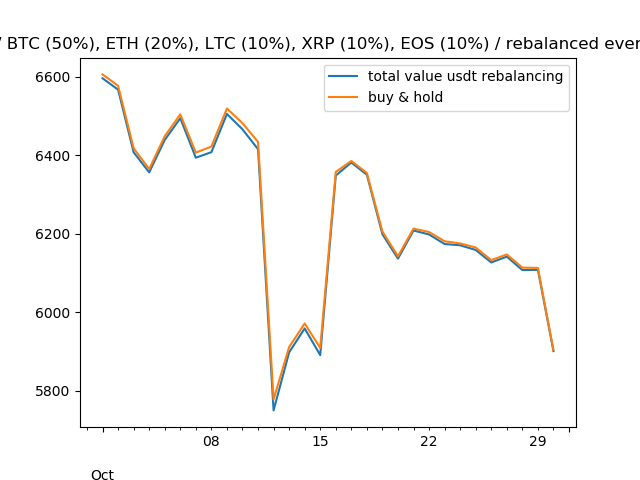

<IPython.core.display.Javascript object>


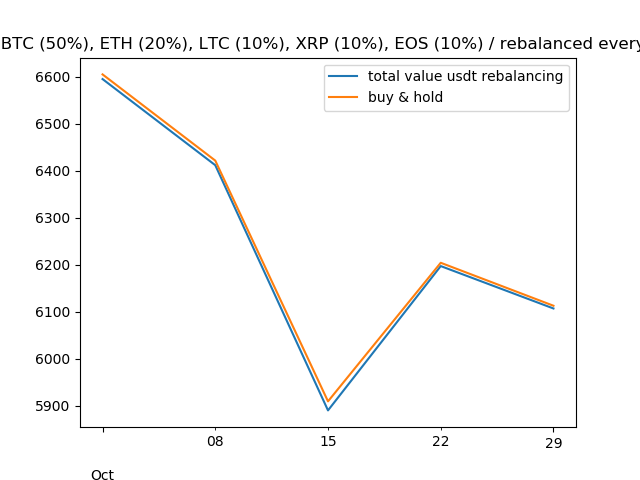

In [2]:
c.save_return_figs('blog-figures')

In [3]:
df_subset = save_info(c, 'backtesting_packs.xlsx')

<IPython.core.display.Javascript object>


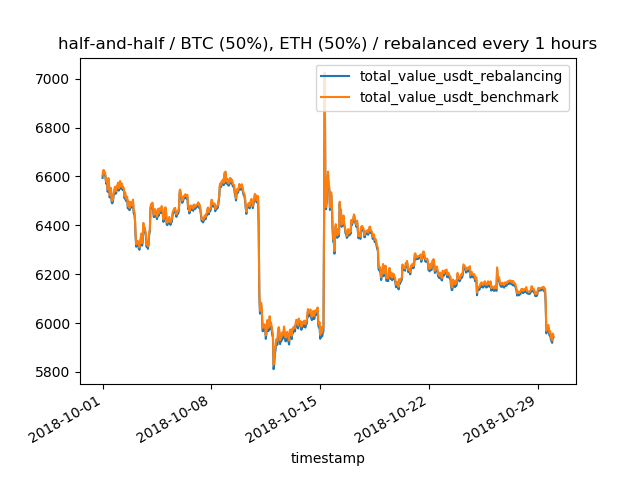

<IPython.core.display.Javascript object>


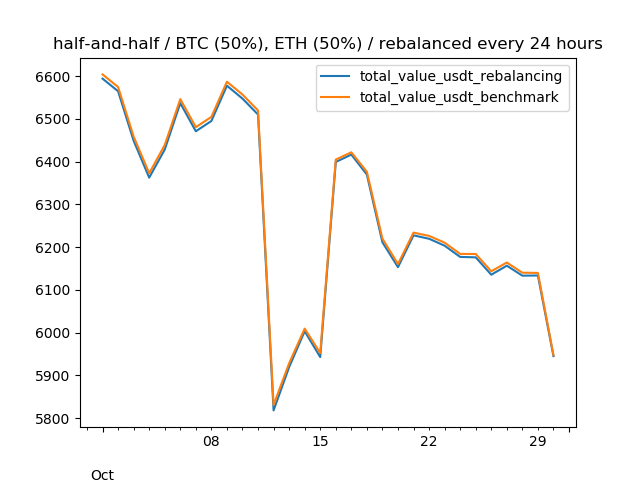

<IPython.core.display.Javascript object>


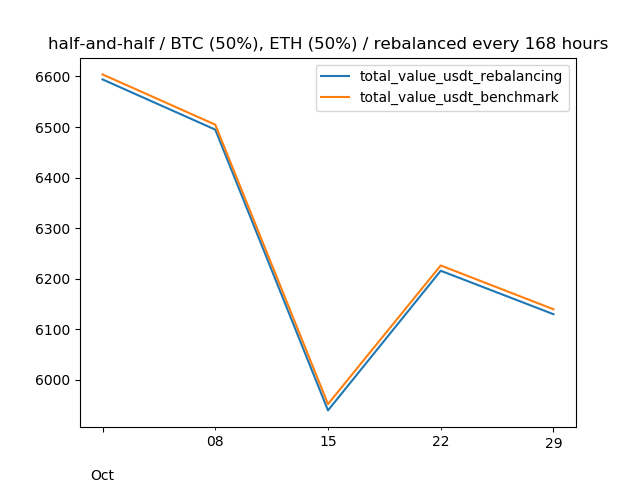

<IPython.core.display.Javascript object>


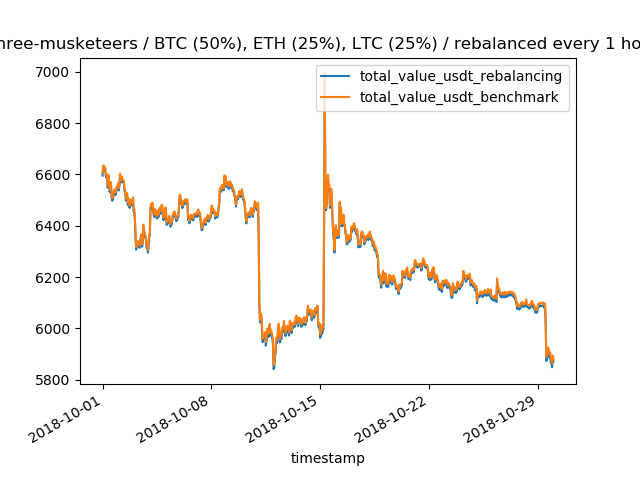

<IPython.core.display.Javascript object>


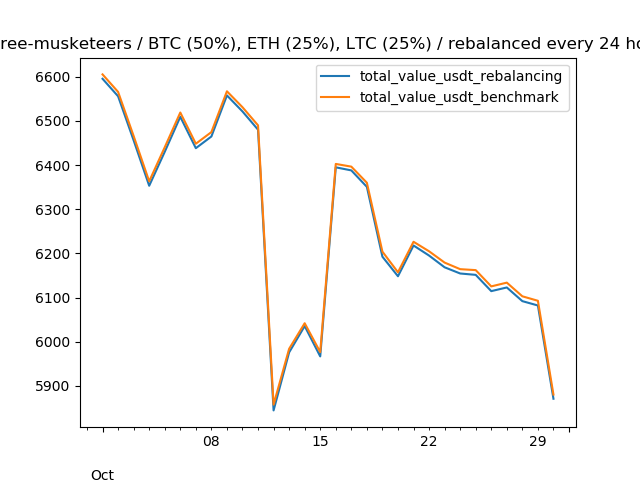

<IPython.core.display.Javascript object>


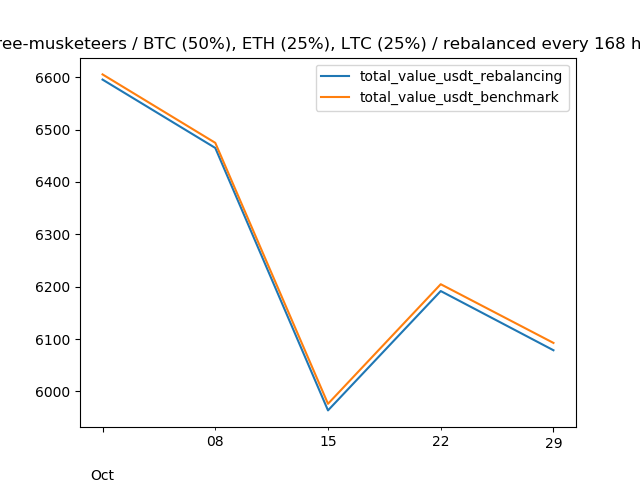

<IPython.core.display.Javascript object>


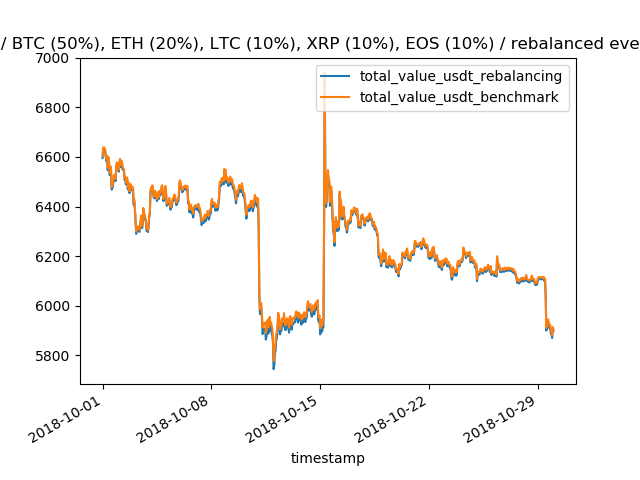

<IPython.core.display.Javascript object>


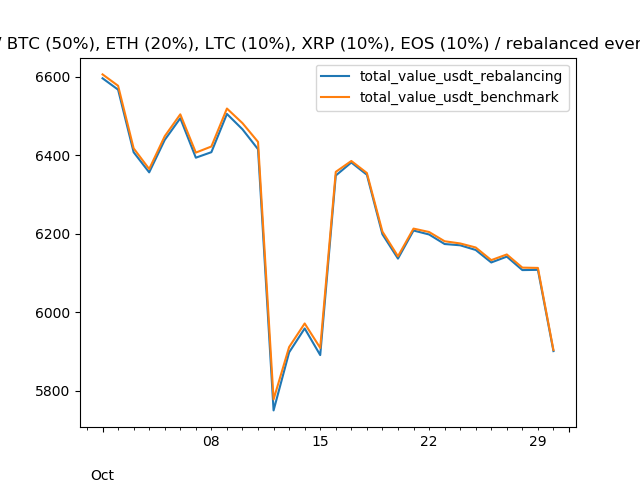

<IPython.core.display.Javascript object>


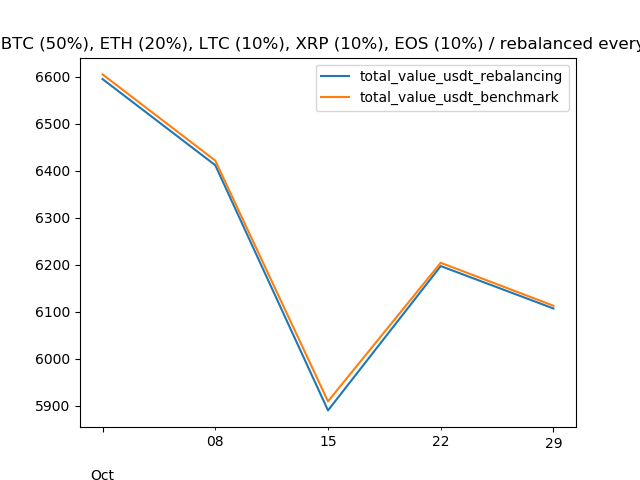

In [4]:
c.plot_all_returns()

In [5]:
b = c._portfolio_backtests[('half-and-half',3600)]
print(b.profit)
print(b.benchmark_profit)
print(b.gain_over_benchmark)
print(b.percent_gain_over_benchmark)


-0.06087876138012127
-0.06011995022564309
-0.0007588111544781784
-0.0007607129368202289


<IPython.core.display.Javascript object>


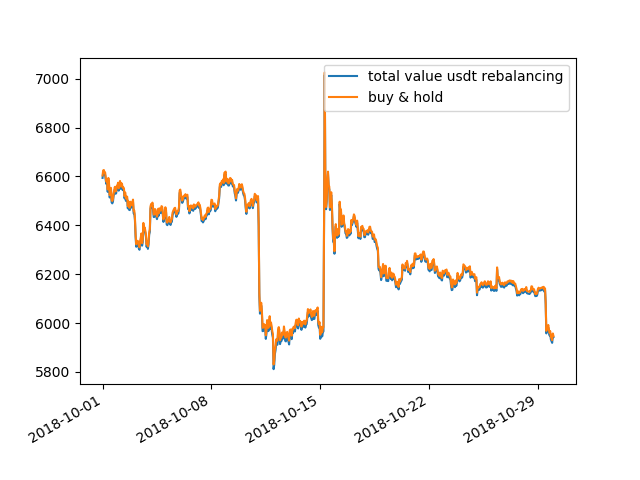

In [6]:
chart = b.get_rebalancing_vs_benchmark_dataframe()[
            ['total_value_usdt_rebalancing', 'total_value_usdt_benchmark']].plot()
chart.set_xlabel('')
chart.set_ylabel('')
chart.legend(['total value usdt rebalancing', 'buy & hold'])
fig = chart.get_figure()
fig.savefig('test.svg')

In [7]:
c._portfolio_backtests.keys()

dict_keys([('half-and-half', 3600), ('half-and-half', 86400), ('half-and-half', 604800), ('three-musketeers', 3600), ('three-musketeers', 86400), ('three-musketeers', 604800), ('fab-five', 3600), ('fab-five', 86400), ('fab-five', 604800)])

<IPython.core.display.Javascript object>


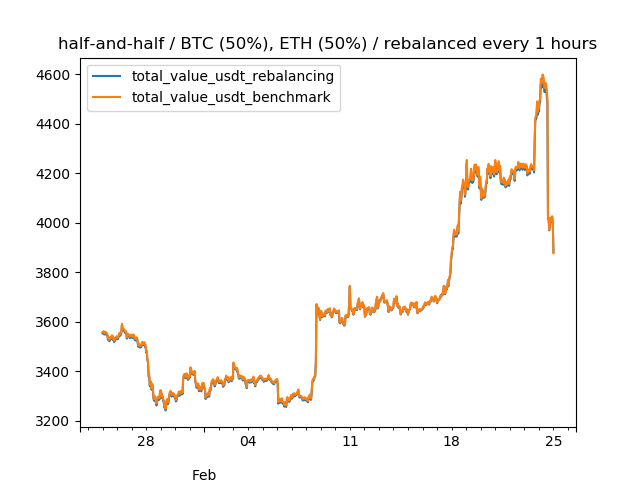

<IPython.core.display.Javascript object>


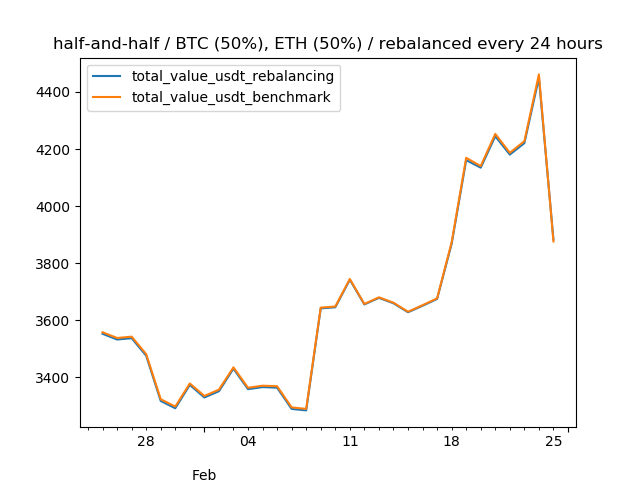

<IPython.core.display.Javascript object>


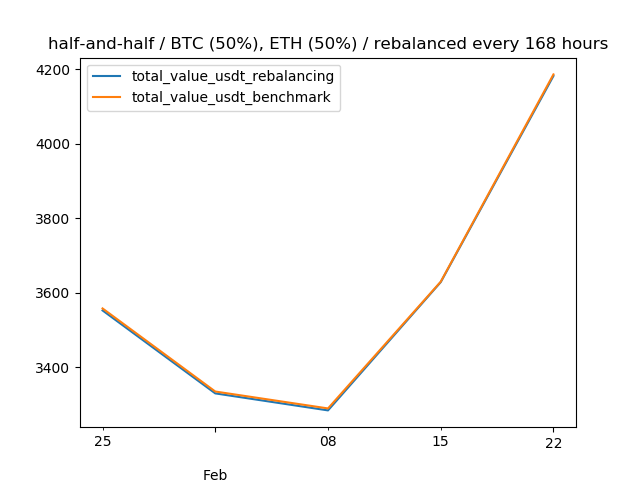

<IPython.core.display.Javascript object>


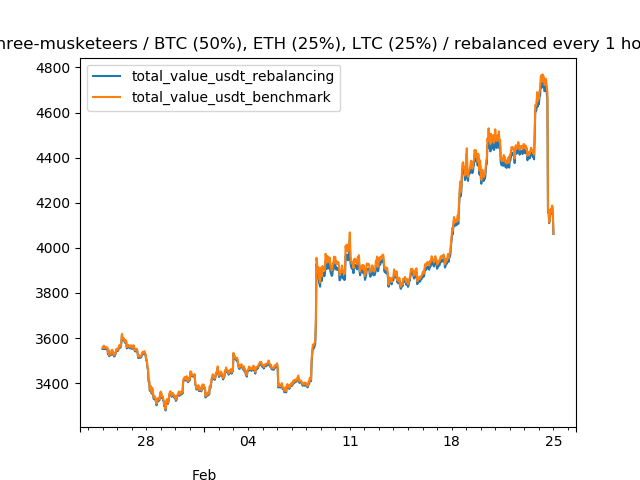

<IPython.core.display.Javascript object>


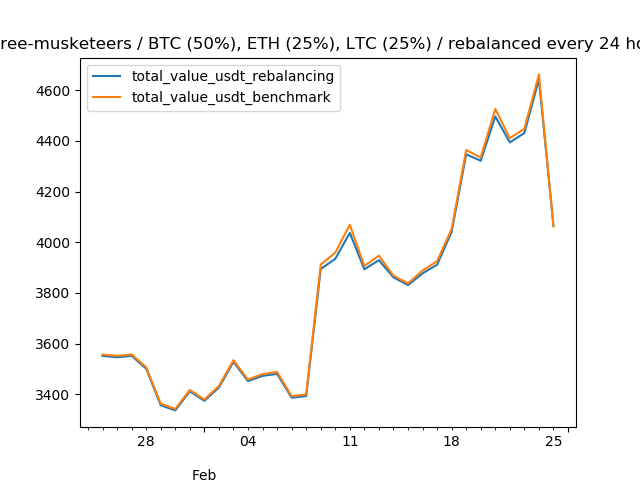

<IPython.core.display.Javascript object>


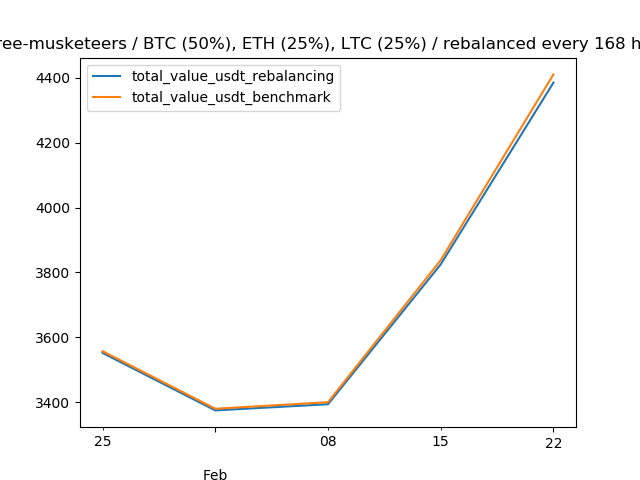

<IPython.core.display.Javascript object>


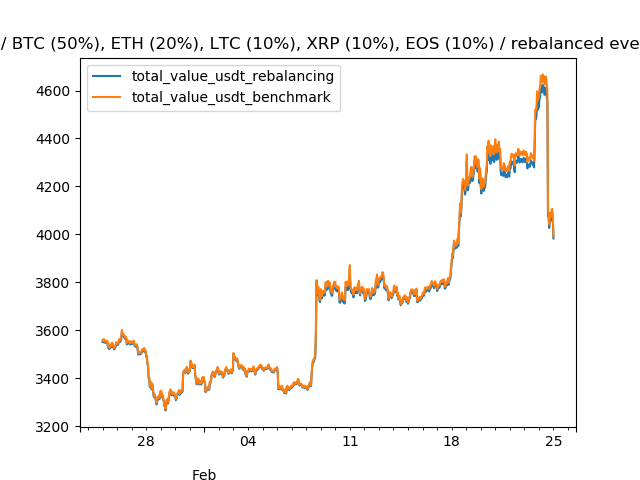

<IPython.core.display.Javascript object>


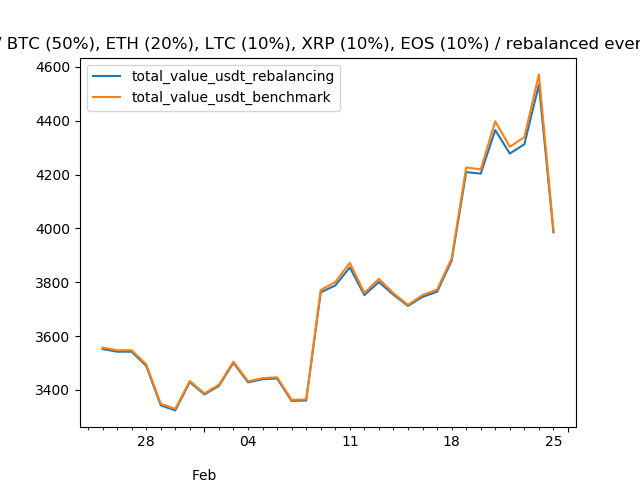

<IPython.core.display.Javascript object>


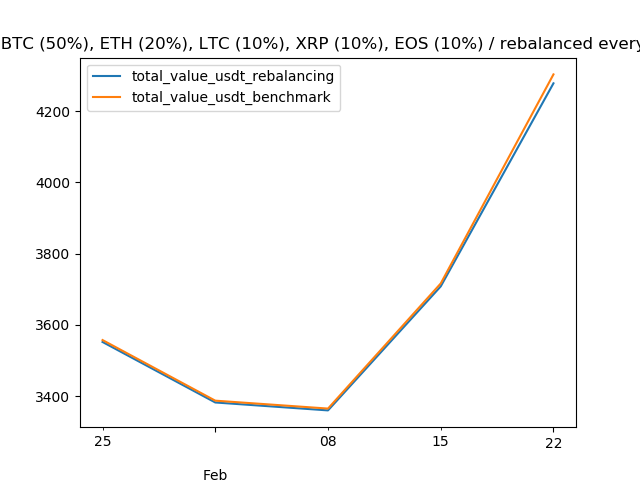

In [8]:
periods = {
    '1m': ('2019/01/25 00:00:00 UTC', '2019/02/25 00:00:00 UTC'),
    #'3m': ('2018/11/25 00:00:00 UTC', '2019/02/25 00:00:00 UTC'),
    #'6m': ('2018/08/25 00:00:00 UTC', '2019/02/25 00:00:00 UTC'),
}
cumulative_results = []
for name, period in periods.items():
    start_time = period[0]
    end_time = period[1]
    c = test_packs(start_time, end_time)
    c.plot_all_returns()
    cumulative_results.append(c)
    #save_info(c, f'backtesting_packs_{name}.xlsx')
    
    